In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


In [3]:
df = pd.read_csv(r"D:\SRI_STUFF\elevate\Iris.csv")  

print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
df.head()

Shape of dataset: (150, 6)

Columns:
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [7]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

print("Encoded target values mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

df.head()

Encoded target values mapping:
Iris-setosa: 0
Iris-versicolor: 1
Iris-virginica: 2


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [8]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))        
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
accuracy=list()
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    print(f"Accuracy for k={i}: {accuracy_score(y_test,y_pred)}")

Accuracy for k=1: 0.9666666666666667
Accuracy for k=2: 0.9333333333333333
Accuracy for k=3: 1.0
Accuracy for k=4: 1.0
Accuracy for k=5: 1.0
Accuracy for k=6: 0.9666666666666667
Accuracy for k=7: 0.9666666666666667
Accuracy for k=8: 0.9666666666666667
Accuracy for k=9: 1.0
Accuracy for k=10: 1.0


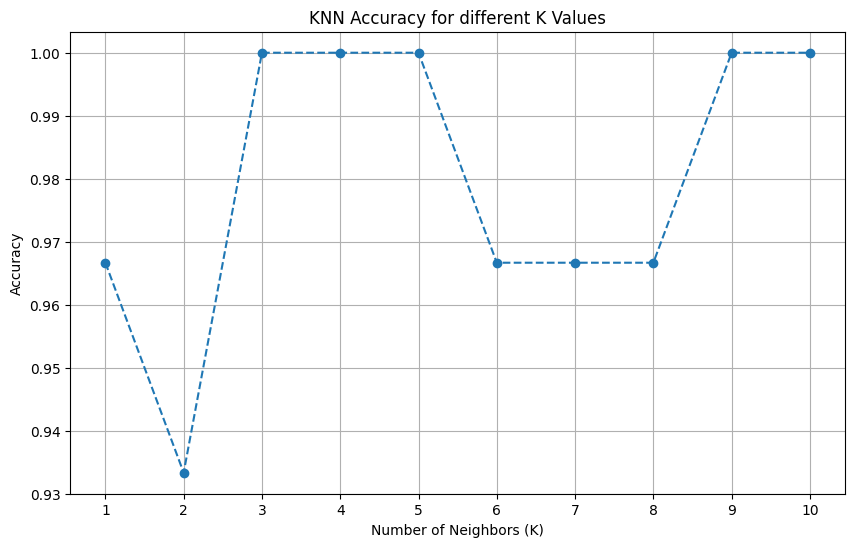

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), accuracy, marker='o', linestyle='dashed')
plt.title('KNN Accuracy for different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

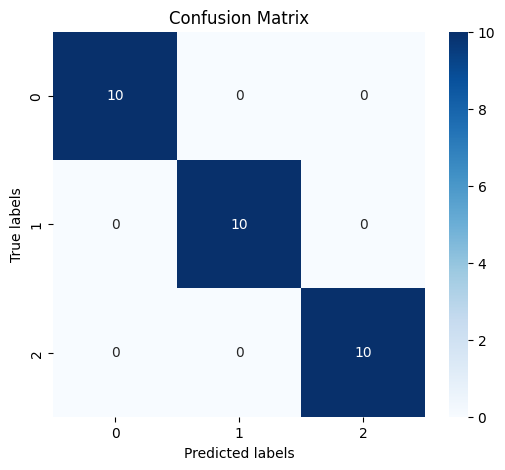

In [21]:
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

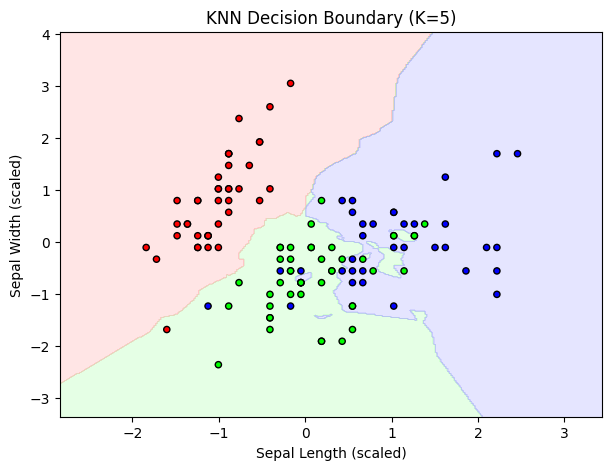

In [25]:
# Cell 8 - Visualize Decision Boundaries (first two features)
from matplotlib.colors import ListedColormap

X_2d = X.iloc[:, :2].values
y_2d = y.values

X_train, X_test, y_train, y_test = train_test_split(X_2d, y_2d, test_size=0.2, random_state=42, stratify=y_2d)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF']))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=ListedColormap(['#FF0000','#00FF00','#0000FF']), edgecolor='k', s=20)
plt.title(f"KNN Decision Boundary (K=5)")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.show()
